In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianDropout
import tensorflow.keras.optimizers as optimizers
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model as linear_model

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
cols_with_nans_test = df_test.columns[df_test.isna().any()].tolist()
cols_with_nans_train = df_train.columns[df_train.isna().any()].tolist()
cols_with_nans = list(set(cols_with_nans_train) | set(cols_with_nans_test))
# Drop these columns from df2
df_train_nona = df_train.drop(columns=cols_with_nans)

df_test_nona = df_test.drop(columns=cols_with_nans)
# df_train_nona = df_nona.dropna(axis=1, how='any')
print(df_train_nona.isna().sum())

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64


In [4]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the data
for column in df_train_nona.columns:
    if df_train_nona[column].dtype==object:
        df_train_nona[column] = label_encoder.fit_transform(df_train_nona[column])
        df_test_nona[column] = label_encoder.fit_transform(df_test_nona[column])
print(df_test_nona.dtypes)

Id               int64
MSSubClass       int64
LotArea          int64
Street           int64
LotShape         int64
LandContour      int64
LotConfig        int64
LandSlope        int64
Neighborhood     int64
Condition1       int64
Condition2       int64
BldgType         int64
HouseStyle       int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle        int64
RoofMatl         int64
ExterQual        int64
ExterCond        int64
Foundation       int64
Heating          int64
HeatingQC        int64
CentralAir       int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
PavedDrive       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold     

In [5]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
y = df_train_nona['SalePrice']
X = df_train_nona.drop(['SalePrice'], axis=1)
X_check = df_test_nona
# Apply MinMaxScaler to all numerical columns
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_check = pd.DataFrame(scaler.fit_transform(X_check), columns=X_check.columns)
print(X)

            Id  MSSubClass   LotArea  Street  LotShape  LandContour  \
0     0.000000    0.235294  0.033420     1.0       1.0          1.0   
1     0.000685    0.000000  0.038795     1.0       1.0          1.0   
2     0.001371    0.235294  0.046507     1.0       0.0          1.0   
3     0.002056    0.294118  0.038561     1.0       0.0          1.0   
4     0.002742    0.235294  0.060576     1.0       0.0          1.0   
...        ...         ...       ...     ...       ...          ...   
1455  0.997258    0.235294  0.030929     1.0       1.0          1.0   
1456  0.997944    0.000000  0.055505     1.0       1.0          1.0   
1457  0.998629    0.294118  0.036187     1.0       1.0          1.0   
1458  0.999315    0.000000  0.039342     1.0       1.0          1.0   
1459  1.000000    0.000000  0.040370     1.0       1.0          1.0   

      LotConfig  LandSlope  Neighborhood  Condition1  ...  WoodDeckSF  \
0           1.0        0.0      0.208333       0.250  ...    0.000000   
1

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1095, 46) (1095,) (365, 46) (365,)


In [7]:
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_pred_skl = clf.predict(X_test)
# np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))

(0.0, 1000000.0)

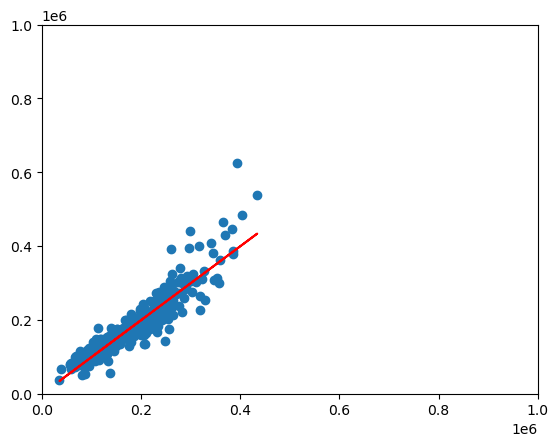

In [8]:
plt.scatter(y_pred_skl, y_test)
plt.plot(y_pred_skl, y_pred_skl, 'r')
plt.xlim([0,1e6])
plt.ylim([0,1e6])

In [9]:
y_ans_skl = clf.predict(X_check)
df_ans_skl = pd.DataFrame({'Id': df_test.Id, 'SalePrice': y_ans_skl})

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [46]:
model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'), # hidden
        Dense(32, activation='relu'), # hidden
        Dense(16, activation='relu'), # hidden
        Dense(1), # output
        ])

/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [48]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39696461824.0000 - mean_absolute_error: 183781.6406 - val_loss: 42403786752.0000 - val_mean_absolute_error: 184274.8750
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37771415552.0000 - mean_absolute_error: 178232.6875 - val_loss: 42327891968.0000 - val_mean_absolute_error: 184073.5469
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37626978304.0000 - mean_absolute_error: 179496.0156 - val_loss: 41813815296.0000 - val_mean_absolute_error: 182705.6406
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36877570048.0000 - mean_absolute_error: 177510.9219 - val_loss: 39624826880.0000 - val_mean_absolute_error: 176766.8281
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32199929856.0000 - mean_absolute_error: 165021.1406 - val_loss: 33206706176.0000 - val_mean_absolute_error: 158095.4531
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25170126848.0000 - mean_absolute_error: 140859.7344 

In [49]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

Test Loss (MSE): 1623469440.0
Test MAE: 26214.66015625


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1297400960.0000 - mean_absolute_error: 22566.9883 - val_loss: 1110601856.0000 - val_mean_absolute_error: 21931.3906
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1622641408.0000 - mean_absolute_error: 22839.4082 - val_loss: 1099749888.0000 - val_mean_absolute_error: 21979.8281
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1422269056.0000 - mean_absolute_error: 21843.6543 - val_loss: 1097903872.0000 - val_mean_absolute_error: 21883.0840
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1449879040.0000 - mean_absolute_error: 22386.8867 - val_loss: 1106118016.0000 - val_mean_absolute_error: 21900.4551
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1283136128.0000 - mean_absolute_error: 21719.3574 - val_loss: 1096330240.0000 - val_mean_absolute_error: 21876.8867
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1185225344.0000 - mean_absolute_error: 21576.8984 - val_loss: 1115

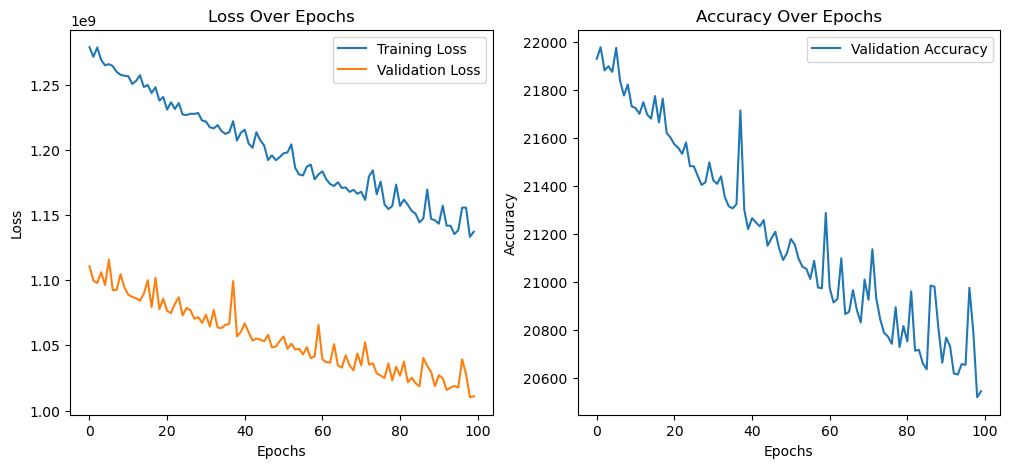

In [56]:

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=50, verbose=1)

# Plotting loss and accuracy
def plot_metrics(history):
    # Get values from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_mean_absolute_error']

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Call the function to plot metrics
plot_metrics(history)

In [50]:
y_pred_keras = model.predict(X_test)
print(np.ravel(y_pred_keras).shape, y_test.shape)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(365,) (365,)


(0.0, 1000000.0)

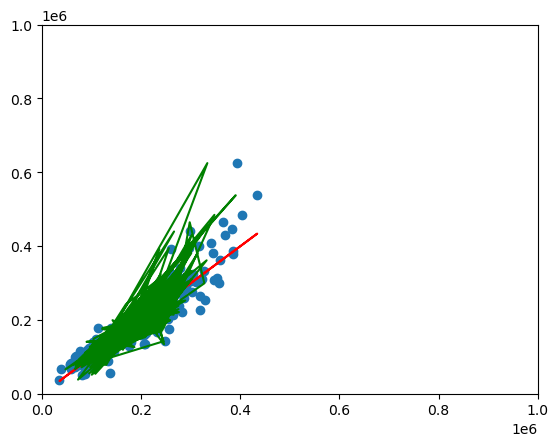

In [57]:
plt.scatter(y_pred_skl, y_test)
plt.plot(y_pred_skl, y_pred_skl, 'r')
plt.plot(np.ravel(y_pred_keras), y_test, 'g')
plt.xlim([0,1e6])
plt.ylim([0,1e6])

In [52]:
print(y_pred_keras)

[[132994.69 ]
 [193916.7  ]
 [244040.84 ]
 [302724.72 ]
 [172161.83 ]
 [142451.73 ]
 [172273.69 ]
 [164190.02 ]
 [248476.2  ]
 [137993.53 ]
 [238577.8  ]
 [124339.16 ]
 [ 96630.52 ]
 [276964.5  ]
 [128728.91 ]
 [107155.89 ]
 [134306.19 ]
 [242304.94 ]
 [166921.06 ]
 [123519.01 ]
 [255079.75 ]
 [116362.84 ]
 [162093.42 ]
 [272643.8  ]
 [306259.3  ]
 [168772.42 ]
 [166507.92 ]
 [201710.7  ]
 [233698.28 ]
 [313601.28 ]
 [227792.02 ]
 [104818.484]
 [240148.58 ]
 [180837.97 ]
 [ 68140.66 ]
 [248069.86 ]
 [142868.39 ]
 [233421.38 ]
 [161496.11 ]
 [195059.3  ]
 [143582.52 ]
 [276526.62 ]
 [144250.52 ]
 [101904.45 ]
 [215338.56 ]
 [245423.83 ]
 [120237.055]
 [225311.98 ]
 [252717.   ]
 [208977.23 ]
 [242639.73 ]
 [220068.92 ]
 [153461.89 ]
 [256124.83 ]
 [265738.88 ]
 [164520.98 ]
 [119800.53 ]
 [215674.05 ]
 [169308.23 ]
 [143273.67 ]
 [181705.84 ]
 [182716.31 ]
 [ 87611.06 ]
 [197945.98 ]
 [174878.7  ]
 [208132.39 ]
 [ 80262.95 ]
 [269817.03 ]
 [199275.4  ]
 [151952.45 ]
 [163158.33 ]
 [1162

In [19]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/riobanerjee/miniforge3/envs/mlenv/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this

Using mps device


In [20]:
X_train_torch = torch.from_numpy(X_train).float().to(device)
y_train_torch = torch.from_numpy(y_train).float().to(device)
X_test_torch = torch.from_numpy(X_test).float().to(device)
y_test_torch = torch.from_numpy(y_test).float().to(device)

In [21]:
input_size = X_train_torch.shape[1]
output_size = 1
hidden_size = 64
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model_torch = SimpleNN().to(device)

In [24]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_torch.parameters(), lr=0.01)

losses = []
accuracies = []

num_epochs = 50
for epoch in range(num_epochs):
    # Forward pass
    model_torch.train()
    outputs = model_torch(X_train_torch)
    loss = criterion(outputs, y_train_torch.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss
    losses.append(loss.item())

    # Calculate accuracy (optional, depending on the task)
    with torch.no_grad():
        y_pred = model_torch(X_test_torch)
        accuracy = torch.mean((y_pred.view(-1) - y_test_torch).abs()).item()
        accuracies.append(accuracy)

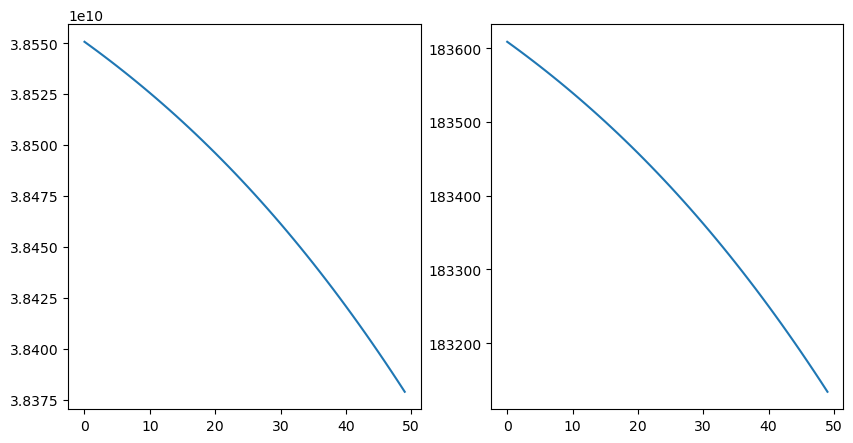

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)

plt.show()

In [26]:
print(y_pred)

tensor([[669.3309],
        [644.5585],
        [576.3304],
        [739.2354],
        [757.6609],
        [671.5624],
        [622.7303],
        [631.2687],
        [618.7894],
        [645.0546],
        [765.3608],
        [641.6669],
        [661.0852],
        [791.4484],
        [677.7039],
        [586.8376],
        [732.5312],
        [594.3370],
        [623.5728],
        [631.7155],
        [675.0273],
        [594.7103],
        [760.7764],
        [767.6873],
        [776.0883],
        [852.9670],
        [663.9960],
        [678.7340],
        [702.4470],
        [758.8459],
        [672.7811],
        [715.4352],
        [758.2016],
        [644.6426],
        [530.0900],
        [725.9955],
        [652.8641],
        [656.3290],
        [810.6555],
        [776.5560],
        [618.1285],
        [724.3521],
        [637.9960],
        [586.3538],
        [657.4735],
        [680.5853],
        [588.8451],
        [659.8016],
        [675.0723],
        [683.8255],


In [ ]:
?